# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)




3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)



4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




# Solucion 

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [2]:
#librerias 
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

In [ ]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x)

In [ ]:
x = np.linspace(-2, 2, 100)

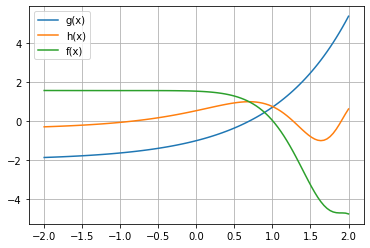

In [ ]:
plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, h(x)-g(x), label="f(x)")
plt.grid()
plt.legend()

In [ ]:
root = optimize.bisect(f, 1, 4)
print({root})

{1.007623971657722}


In [ ]:
# Metodo Newton Rapshod
root2 = optimize.newton(f, 3)
print({root})


{1.007623971657722}


In [ ]:
root1-root2

-4.147793219999585e-13

Punto 2.

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}



In [ ]:
f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega))

h = lambda omega : f(omega)-g(omega)
omega = np.linspace(-np.pi/4, np.pi/4)


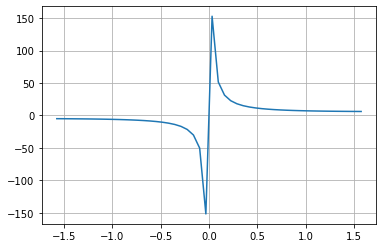

In [ ]:
plt.figure()
plt.plot(omega, h(omega) )
plt.grid()

root = optimize.newton(h, 2)
print({root})




5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [ ]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [ ]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [ ]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


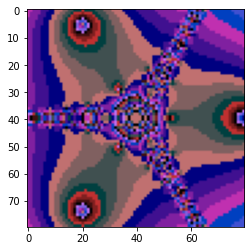

In [ ]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)


3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)

Podemos reescribir la ecuación de la siguiente manera:

\begin{equation}
V - L\frac{1}{2}\pi r^2+Lr^2 \arcsin{\frac{h}{r}}=-L h(r^2-h^2) ^{1/2} 
\end{equation}


In [45]:
#Dando valor a las variables
V = 12.4
L = 10
r = 1

#contruyendo funciones 
g = lambda h: V - L * 0.5 * np.pi * r**2 + L * r**2 * np.arcsin(h/r)
f = lambda h: -L * h * ( r**2 - h**2 )**0.5
j = lambda h: g(h) - f(h)

#Dandole valores a la variable independiente
h = np.linspace(-1, 1)

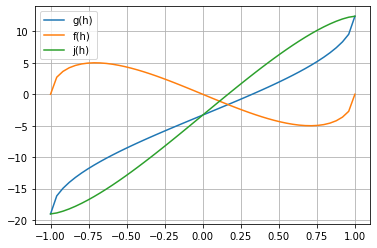

In [46]:
# creando un grafico para porder ver un posible valor de la semilla

plt.plot(h, g(h), label="g(h)")
plt.plot(h, f(h), label="f(h)")
plt.plot(h, j(h), label="j(h)")
plt.grid()
plt.legend()

In [47]:
#Valor por medio del método de bisección

root = optimize.bisect(j, -0.25, 0.25)
print({root})

{0.1661660346599092}


In [49]:
#Valor por el método de newton

root = optimize.newton(j, 0.25)
print({root})

{0.16616603465836782}


4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden

\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha)=  C \cos(\alpha) +  E  \sin(\alpha)
\end{equation}



In [3]:
#Dando valor a las variables

beta = np.deg2rad(11.5)
l = 89
h = 49
D = 55
A = l * np.sin(beta)
B = l * np.cos(beta)
C = ( h + 0.5 * D ) * np.sin( beta ) - 0.5 * D * np.tan( beta )
E = ( h + 0.5 * D ) * np.cos( beta ) - 0.5 * D 

In [4]:
#Creando funciónes a partir de la función principal con variable independiente alfa

g = lambda alfa: A * np.sin(alfa) * np.cos(alfa) + B * (np.sin(alfa))**2
f = lambda alfa: C * np.cos(alfa) + E * np.sin(alfa)
j = lambda alfa: g(alfa) - f(alfa)

alfa = np.linspace(-1, 1)

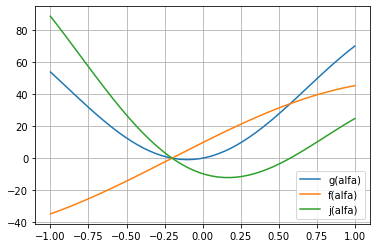

In [5]:
#Grafico para porder escoger un valor apropiado para la semilla

plt.plot(alfa, g(alfa), label="g(alfa)")
plt.plot(alfa, f(alfa), label="f(alfa)")
plt.plot(alfa, j(alfa), label="j(alfa)")
plt.grid()
plt.legend()

In [6]:
#Solución método de bisección

root = optimize.bisect(j, 0.5, 0.75)
print({root*180/np.pi})

{32.97217482236639}


In [9]:
#Valor por el método de newton

root = optimize.newton(j, 0.5)
print({root*180/np.pi})

{32.97217482241959}
